In [52]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("verification_any_topic - verification_any_topic.csv")

In [5]:
df['Nikolay'] = df['Nikolay'].apply(round)

In [3]:
df.head()

,text,inapp,toxic,topic,toxic_inapp,toxic_app,notoxic_inapp,notoxic_app,agree,binarized,average,Varvara,Nikolay,sanity_check
0,(OP)Делить людей на быдло и не быдло - первый...,0.777729,0.978835,social_injustice,True,False,False,False,NaN,1,1.0,1,1.0,True
1,(OP)На третьем пике по середине обычный офисн...,0.991046,0.002133,social_injustice,False,False,True,False,NaN,1,1.0,1,1.0,True
2,"(OP)Опчик, а я уже второй день колбашусь с по...",0.674704,0.007797,drugs,False,False,False,True,NaN,1,1.0,1,1.0,True
3,"(OP)после этого вы меня будете уюеждать, что ...",0.642163,0.005001,social_injustice,False,False,False,True,NaN,1,1.0,1,1.0,True
4,"(OP)У меня хоть на мужиков и стоит, но я каку...",0.862354,0.597659,sexism,False,False,True,False,NaN,1,1.0,1,1.0,True


In [12]:
df_test = df[df['toxic_inapp']]

In [13]:
cohen_kappa_score(df_test['Varvara'],df_test['Nikolay'])

0.24242424242424243

In [16]:
 Counter(df[df['toxic_inapp']]['Varvara'] == df[df['toxic_inapp']]['Nikolay'])

Counter({True: 21, False: 4})

In [17]:
 Counter(df[df['notoxic_app']]['Varvara'] == df[df['notoxic_app']]['Nikolay'])

Counter({True: 22, False: 3})

In [18]:
 Counter(df[df['notoxic_inapp']]['Varvara'] == df[df['notoxic_inapp']]['Nikolay'])

Counter({True: 21, False: 4})

In [6]:
cohen_kappa_score(df['Varvara'],df['Nikolay'])

0.6558704453441295

In [8]:
def check_agreement_by_group(dfc):
    collected_data = []
    for tox_inapp_rel_type in ['toxic_inapp','toxic_app','notoxic_inapp','notoxic_app']:
        df_curr_type = dfc[dfc[tox_inapp_rel_type]]
        cappa = cohen_kappa_score(df_curr_type['Varvara'],df_curr_type['Nikolay'])
        if tox_inapp_rel_type != 'notoxic_app':#должно быть так или иначе плохим
            correct_rate = sum(df_curr_type['binarized'])/len(df_curr_type['binarized'])#в каком кол-ве случаев действительно плохо
        else:
            correct_rate = 1 - sum(df_curr_type['binarized'])/len(df_curr_type['binarized'])#в каком кол-ве случев действительно ок
        collected_data.append([tox_inapp_rel_type, cappa,correct_rate])   
    report_df = pd.DataFrame(data = collected_data, columns = ['group','cappa','correct_rate'])
    return report_df

dfr = check_agreement_by_group(df)

In [26]:
def check_filtering(dfc):
    collected_data = []
    
    df_bad = dfc[(dfc['toxic_inapp']==True)|(dfc['toxic_app']==True)|(dfc['notoxic_inapp']==True)]
    cappa_bad = cohen_kappa_score(df_bad['Varvara'],df_bad['Nikolay'])
    correct_rate_bad = sum(df_bad['binarized'])/len(df_bad['binarized'])
    collected_data.append(['inapp/toxic',cappa_bad,correct_rate_bad])
    
    df_good = dfc[dfc['notoxic_app'] == True]
    cappa_good = cohen_kappa_score(df_good['Varvara'],df_good['Nikolay'])
    correct_rate_good = 1 - sum(df_good['binarized'])/len(df_good['binarized'])  
    collected_data.append(['OK',cappa_good,correct_rate_good])
    
    report_df = pd.DataFrame(data = collected_data, columns = ['group','cappa','correct_rate'])
    return report_df

In [61]:
def get_conf_matrix(dfc):
    collected_data = []
    
    df_bad = dfc[(dfc['toxic_inapp']==True)|(dfc['toxic_app']==True)|(dfc['notoxic_inapp']==True)]
    predicts_bad = df_bad['binarized'].tolist()
    trues_bad = [1] * len(df_bad['binarized'])
    
    df_good = dfc[dfc['notoxic_app'] == True]
    predicts_good =  df_good['binarized'].tolist()
    trues_good = [0] * len(df_good['binarized'])
    
    preds = predicts_bad + predicts_good
    trues = trues_bad + trues_good
    
    

    #Generate the confusion matrix
    cf_matrix = confusion_matrix(trues, preds)
    cf_matrix = cf_matrix/ cf_matrix.astype(np.float).sum(axis=0)
    
    df_cm = pd.DataFrame(cf_matrix, index = ['ok','toxic/inapp'],
                  columns = ['ok','toxic/inapp'])

    plt.figure(figsize = (3,3))
    sn.heatmap(df_cm, annot=True)
    

# With any topic

In [62]:
check_filtering(df)

,group,cappa,correct_rate
0,inapp/toxic,0.583002,0.76
1,OK,0.688797,0.68


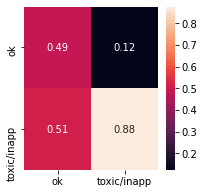

In [63]:
get_conf_matrix(df)

In [9]:
dfr.head()

,group,cappa,correct_rate
0,toxic_inapp,0.242424,0.96
1,toxic_app,0.452555,0.44
2,notoxic_inapp,0.519231,0.88
3,notoxic_app,0.688797,0.68


# No topic

In [28]:
df_no_topic = pd.read_csv("verification_no_topic - verification_no_topic.csv")

In [33]:
df_no_topic['Nikolay'] = df_no_topic['Nikolay'].apply(round)
df_no_topic['Varvara'] = df_no_topic['Varvara'].apply(round)

In [35]:
cohen_kappa_score(df_no_topic['Varvara'],df_no_topic['Nikolay'])

0.7210043842168194

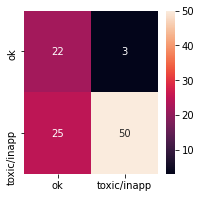

In [49]:
get_conf_matrix(df_no_topic)

In [34]:
dfr_notop = check_agreement_by_group(df_no_topic)
dfr_notop.head()

,group,cappa,correct_rate
0,toxic_inapp,0.594595,0.88
1,toxic_app,0.693878,0.32
2,notoxic_inapp,0.402730,0.80
3,notoxic_app,0.778761,0.88
